/data1/jcleng/software/anaconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating datasets:   0% |                                  |  ETA:  --:--:--
Generating datasets:  20% |######                            |  ETA:   0:00:00
Generating datasets:  40% |#############                     |  ETA:   0:00:00
Generating datasets:  80% |###########################       |  ETA:   0:00:00
Generating datasets: 100% |##################################|  Time:  0:00:00


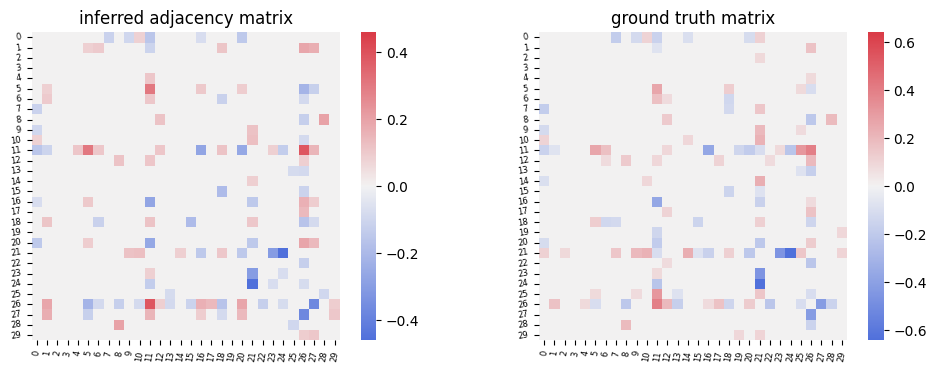

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from fsdiffnet.infer import infer_differential_graph
from fsdiffnet.generate_data import ExpressionProfiles
from fsdiffnet.utils import show_matrix, remove_diag, keep_largest_k, vec2mat, seed_everything, calculate_flip_error

seed_everything(1)
data_params = {
    'p': [30],
    'n': 1000,
    'sample_n': 10,
    'repeats': 1,
    'sparsity': [0.1, 0.3],
    'diff_ratio': [0.3, 0.7],
    'net_rand_mode': 'BA',
    'diff_mode': 'hub',
    'target_type': 'float',
    'usage': 'comparison',
    'flip': True,
    'withdiag': True,
    'sigma_diag': True
}
example_data = ExpressionProfiles(
        **data_params
    )

(sigma, delta, *X) = example_data[0] # X is a list of expression profiles X1, X2, each with a shape of (n, p), in this case, (1000, 39).
cov1 = np.corrcoef(X[0].T)
cov2 = np.corrcoef(X[1].T)

input = np.stack((cov1, cov2))
input = input[np.newaxis, :]
input = torch.tensor(input).float()

# inferring step
inferred_matrix = infer_differential_graph(input)

inferred_matrix = keep_largest_k(remove_diag(inferred_matrix), data_params['p'][0]*4)
ground_truth = keep_largest_k(vec2mat(delta)[0], data_params['p'][0]*4)

fig, axes = plt.subplots(1, 2, figsize = (12,4))
show_matrix(inferred_matrix, ax = axes[0], title='inferred adjacency matrix')
show_matrix(ground_truth, ax = axes[1], title='ground truth matrix')
plt.show()

In [2]:
from tqdm import tqdm

inferred_matrices = []
print("inferring differetial graphs...")
for i in tqdm(range(10)):
    (sigma, delta, *X) = example_data[i] # X is a list of expression profiles X1, X2, each with a shape of (n, p), in this case, (1000, 39).
    cov1 = np.corrcoef(X[0].T)
    cov2 = np.corrcoef(X[1].T)

    input = np.stack((cov1, cov2))
    input = input[np.newaxis, :]
    input = torch.tensor(input).float()

    inferred_matrix = infer_differential_graph(input)
    inferred_matrices.append(inferred_matrix)
    
print("Calculating the filp error...")
filp_error = calculate_flip_error(inferred_matrices) 
    
print(f"The filp error of FSDiffNet is \033[31m {filp_error:.6f} \033[0m.")

inferring differetial graphs...


100%|██████████| 10/10 [00:00<00:00, 25.96it/s]

Calculating the filp error...
The filp error of FSDiffNet is  0.000000 .
